# Pertemuan 5 Data Science 06
## Classification dnegan K-Nearest Neighbours
## Sumber : https://youtu.be/4zARMcgc7hA

### Classification Dengan KNN (K Nearest Neighbours)
#### - KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karkteristik dengan sejumlah tetangga terdekat
#### - Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

### Sample Dataset

In [4]:
import pandas as pd
sensus = {
    'tinggi' : [185,170,183,191,155,163,180,158,178],
    'berat' : [64,86,84,80,49,59,67,54,67],
    'jk' : ['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita']
}
sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,185,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


### Visualisasi Data

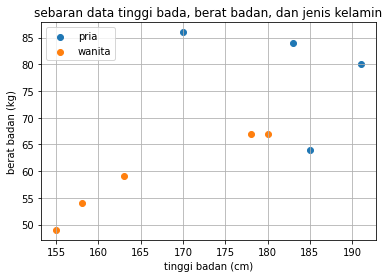

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'],label = jk)
    
plt.legend (loc='upper left')
plt.title('sebaran data tinggi bada, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)')
plt.grid(True)
plt.show()

## Classification Dengan KNN

### Preporcessing Dataset

In [9]:
import numpy as np
X_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:n{X_train}\n')
print(f'y_train: {y_train}')

X_train:n[[185  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


dataset yang diatas perlu di pisahkan terlebih dahulu dalam bentuk X_train dan y_train, X_train berisikan tinggi dan berat dan y_train berisisikan jenis kelamin. dalam bentuk ini X_train sudah dapat di training namun jenis kelamin belum

In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


LabelBinarizer diguanakan untuk melakukan konvert dari bentuk string menjadi bentuk integer. namun bentuk ini masih dalam bentuk array dua dimensi

In [47]:
y_train = y_train.flatten()
print(f'y_train:{y_train}')

y_train:[0 0 0 0 1 1 1 1 1]


Mathod flatten digunakan untuk membuat menjadi satu dimensi

### Training KNN Classification Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier digunakan untuk menjadi classifier task,
perlu membuat parameter K, yang digunakan untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi.

### Prediksi jenis kelamin

In [16]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan,berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

setelah di train, akan melakukan prediksi, dengan data baru yang nantinya akan melihat apakah perempuan atau pria.

In [17]:
y_new = model.predict(X_new)
y_new

array([1])

melakukan prediksi dari data di atas

In [48]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

`lb.inverse_transform` digunakan untuk melakukan transformasi ulang dari bentuk semula. 

catatan(`lb = LabelBinarizer()`)

### Visualisasi Nearest Neighbours

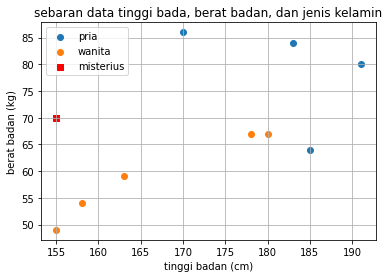

In [49]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label = jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker = 's',
           color ='red',
           label = 'misterius')

plt.legend (loc='upper left')
plt.title('sebaran data tinggi bada, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)')
plt.grid(True)
plt.show()

melakukan marker baru untuk variable `X_new`

### Kalkulasi DIstance (Euclidean Distance)

digunakan untuk mengukur jarak dekekatan dari satu data poin dengan data poin lainnya.

#### $distance = \sqrt{(t_1 - t_2)^2 + (b_1 +b_2)^2}$

- $t1$ : data tinggi badan poin kesatu
- $t2$ : data tinggi badan poin kedua
- $b1$ : data berat badan poin kesatu
- $b2$ : data berat badan poin kedua

In [24]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [25]:
X_train

array([[185,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [29]:
from scipy.spatial.distance import euclidean
data_jarak = [euclidean(misterius,d) for d in X_train]
data_jarak

[30.59411708155671,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [30]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
0,185,64,pria,30.594117
2,183,84,pria,31.304952
3,191,80,pria,37.363083


### Evaluasi KNN Classification Model

#### Testing Set

In [31]:
X_test = np.array([[168,65],[180,96],[160,52],[169,67]])
y_test = lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print(f'X_test :\n{X_test}\n')
print(f'y_test :\n{y_test}\n')

X_test :
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test :
[0 0 1 1]



#### Prediksi terhadap testing set

In [32]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

### Accuracy

- Accuracy is the propotion of testing instances that were classified correctly
### $accuracy = \frac{tp + tn} {tp+tn+fp+fn}$


- $tp$ : true positive (hasil prediksi yang benar secara positif)
- $tn$ : true negative (hasil prediksi yang benar secara negatif)
- $fp$ : false positive (hasil prediksi yang salah yang harusnya positif)
- $fn$ : false negative (hasil prediksi yang salah yang harusnya negatif)

In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy :{acc}')

Accuracy :0.75


### Precission

precission is the proportion of testing instances that were predicted to be positive that are truly positive.
### $precission = \frac{tp}{tp +fp}$

In [36]:
from sklearn.metrics import precision_score

prec = precision_score(y_test , y_pred)
print(f'Precission:{prec}')

Precission:0.6666666666666666


### Recall

recall is the proportion of truly positive test instances that were predicted to be positive.
### $recall = \frac{tp}{tp+fn}$

In [39]:
from sklearn.metrics import recall_score

rec = recall_score (y_test, y_pred)
print(f'Recall : {rec}')

Recall : 1.0


### F1 Score

The F1 Score is the harmonic mean of precision and recall.

### $ F1 = 2 * \frac{precission*recall}{precission+recall}$

In [40]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1-score:{f1}')

F1-score:0.8


### Classification Report

In [41]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



### Matthews Correlation Coefficient (MCC)

- MCC is an alternative to the F1 Score for meansuring the performance of binary classifiers.
- A perfect classifier's MMC is 1 (nilai tertinggi 1)
- A trivial classifier that predicts randomly will score 0, and a prefectly wrong classifier will score -1

### $MCC = \frac{tpXtn+fpXfn}{\sqrt{(tp+fp)X(tp+fn)X(tn+fp)X(tn+fn)}}$

- $tp$ : true positive (hasil prediksi yang benar secara positif)
- $tn$ : true negative (hasil prediksi yang benar secara negatif)
- $fp$ : false positive (hasil prediksi yang salah yang harusnya positif)
- $fn$ : false negative (hasil prediksi yang salah yang harusnya negatif)

In [46]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC:{mcc}')

MCC:0.5773502691896258
